In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aids-data-quest-society/sample_submission.csv
/kaggle/input/aids-data-quest-society/train_ds.csv
/kaggle/input/aids-data-quest-society/test_ds.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
apple_data=pd.read_csv('/kaggle/input/aids-data-quest-society/train_ds.csv',index_col=0)

In [4]:
apple_data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
ID,,,,,,,,
2643.0,1.046240,0.496004,-1.099324,-1.033066,0.386916,-0.108156,0.316697,good
456.0,-0.141586,2.091739,-2.431368,1.498578,-1.071765,2.290815,1.121724,good
3628.0,-3.133888,-0.097508,-1.332843,0.789341,-1.442272,1.058389,-1.038278,bad
1365.0,-1.973097,1.731857,-3.322003,-0.698491,-0.610942,3.563734,1.426288,bad
328.0,3.038896,-2.665844,-1.490831,2.806738,3.200184,-1.194294,1.686512,good


In [5]:
apple_data.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [6]:
apple_data['Quality']=apple_data['Quality'].map({"good":1,"bad":0})

In [7]:
apple_data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
ID,,,,,,,,
2643.0,1.046240,0.496004,-1.099324,-1.033066,0.386916,-0.108156,0.316697,1
456.0,-0.141586,2.091739,-2.431368,1.498578,-1.071765,2.290815,1.121724,1
3628.0,-3.133888,-0.097508,-1.332843,0.789341,-1.442272,1.058389,-1.038278,0
1365.0,-1.973097,1.731857,-3.322003,-0.698491,-0.610942,3.563734,1.426288,0
328.0,3.038896,-2.665844,-1.490831,2.806738,3.200184,-1.194294,1.686512,1


In [8]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3200 entries, 2643.0 to 3148.0
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3200 non-null   float64
 1   Weight       3200 non-null   float64
 2   Sweetness    3200 non-null   float64
 3   Crunchiness  3200 non-null   float64
 4   Juiciness    3200 non-null   float64
 5   Ripeness     3200 non-null   float64
 6   Acidity      3200 non-null   float64
 7   Quality      3200 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 225.0 KB


In [9]:
apple_data.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,-0.505158,-0.994030,-0.458036,0.980499,0.521659,0.483993,0.081752,0.500313
std,1.924380,1.597520,1.949300,1.400370,1.918867,1.878866,2.100689,0.500078
min,-7.151703,-6.581590,-6.894485,-6.055058,-5.814308,-5.864599,-6.955460,0.000000
25%,-1.821048,-2.023510,-1.737704,0.074473,-0.799721,-0.803991,-1.357983,0.000000
50%,-0.514629,-0.976096,-0.491689,0.979064,0.534219,0.501624,0.017395,1.000000
75%,0.813185,0.019627,0.826727,1.889772,1.855892,1.747977,1.511115,1.000000
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.193374,1.000000


In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled=scaler.fit_transform(apple_data)
print(scaled[0:5,:])
scaled=pd.DataFrame(scaled) 

[[0.60465411 0.57205146 0.43673118 0.36724133 0.47054862 0.43934147
  0.51397573 1.        ]
 [0.51704391 0.7010278  0.33634654 0.55237193 0.35986394 0.62243496
  0.57087277 1.        ]
 [0.29634123 0.52408043 0.41913289 0.50050777 0.33174991 0.52837412
  0.41820984 0.        ]
 [0.38195749 0.67194008 0.26922713 0.39170763 0.39483114 0.71958625
  0.59239846 0.        ]
 [0.75162608 0.31649289 0.40722673 0.64803319 0.68401928 0.35644556
  0.61079041 1.        ]]


In [11]:
apple_data.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [12]:
x=apple_data.iloc[:,::-1]
y=apple_data.iloc[:,-1]

In [13]:
x

,Quality,Acidity,Ripeness,Juiciness,Crunchiness,Sweetness,Weight,Size
ID,,,,,,,,
2643.0,1,0.316697,-0.108156,0.386916,-1.033066,-1.099324,0.496004,1.046240
456.0,1,1.121724,2.290815,-1.071765,1.498578,-2.431368,2.091739,-0.141586
3628.0,0,-1.038278,1.058389,-1.442272,0.789341,-1.332843,-0.097508,-3.133888
1365.0,0,1.426288,3.563734,-0.610942,-0.698491,-3.322003,1.731857,-1.973097
328.0,1,1.686512,-1.194294,3.200184,2.806738,-1.490831,-2.665844,3.038896
...,...,...,...,...,...,...,...,...
3386.0,0,-1.044119,1.673354,1.861532,0.171411,0.480126,-0.830394,-1.921919
651.0,1,3.276023,-2.941138,4.428274,3.366983,-1.101011,-2.102417,0.437878
288.0,1,3.551642,1.855762,-0.844019,0.391377,3.562095,-1.402303,-1.964100


In [14]:
y = y.values

In [15]:
y

array([1, 1, 0, ..., 1, 0, 1])

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:

x_train.head()

,Quality,Acidity,Ripeness,Juiciness,Crunchiness,Sweetness,Weight,Size
ID,,,,,,,,
1629.0,1,-1.204729,1.089686,-2.317600,4.227448,-4.539610,-5.570705,0.300843
3073.0,0,-0.680335,3.035092,-1.588422,2.437270,-0.600152,-0.766355,-2.070346
1138.0,0,-1.192431,1.327658,-1.470258,3.513258,1.931253,-0.795279,-2.469140
3691.0,1,-4.120365,0.036148,1.681498,-0.260951,0.887527,-0.567991,-1.490275
3410.0,1,-0.435061,-3.473421,-1.161312,2.225846,-0.439672,2.053538,-3.115689


In [18]:
input_shape=[x_train.shape[1]]

In [19]:

import tensorflow as tf
import keras
from keras import layers
from keras.layers import Dense,BatchNormalization,Dropout

2024-02-27 11:11:26.918194: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 11:11:26.918304: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 11:11:27.080174: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
model=keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(units='4',activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units='2',activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(units=1,activation='sigmoid')
    
    
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 8)                 32        
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 4)                 36        
                                                                 
 batch_normalization_1 (Bat  (None, 4)                 16        
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 batch_normalization_2 (Bat  (None, 2)                 8

In [22]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='binary_accuracy'
)

In [23]:
early_stopping=keras.callbacks.EarlyStopping(
patience=5,
    min_delta=0.001,
    restore_best_weights=True
)

In [24]:
history=model.fit(
x_train,y_train,
    validation_data=(x_test,y_test),
    batch_size=256,
    epochs=200,
    callbacks=[early_stopping]
)

Epoch 1/200
10/10 [==============================] - 2s 30ms/step - loss: 0.6916 - binary_accuracy: 0.5648 - val_loss: 0.7029 - val_binary_accuracy: 0.4766
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 0.6792 - binary_accuracy: 0.5891 - val_loss: 0.7032 - val_binary_accuracy: 0.4719
Epoch 3/200
10/10 [==============================] - 0s 7ms/step - loss: 0.6768 - binary_accuracy: 0.5906 - val_loss: 0.7031 - val_binary_accuracy: 0.4781
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 0.6619 - binary_accuracy: 0.6129 - val_loss: 0.7022 - val_binary_accuracy: 0.4844
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: 0.6568 - binary_accuracy: 0.6242 - val_loss: 0.7007 - val_binary_accuracy: 0.4969
Epoch 6/200
10/10 [==============================] - 0s 7ms/step - loss: 0.6388 - binary_accuracy: 0.6590 - val_loss: 0.6984 - val_binary_accuracy: 0.5156
Epoch 7/200
10/10 [==============================] - 0s 7ms/step - lo

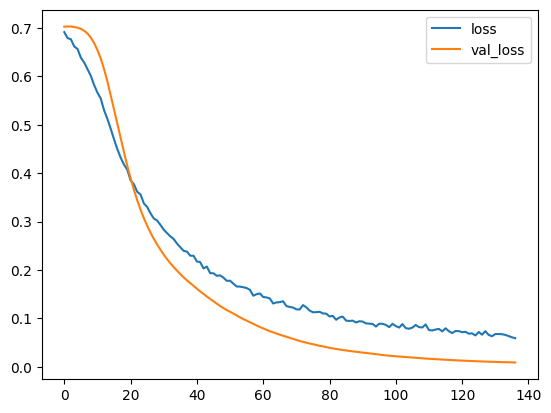

In [25]:
history_df=pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
plt.show()

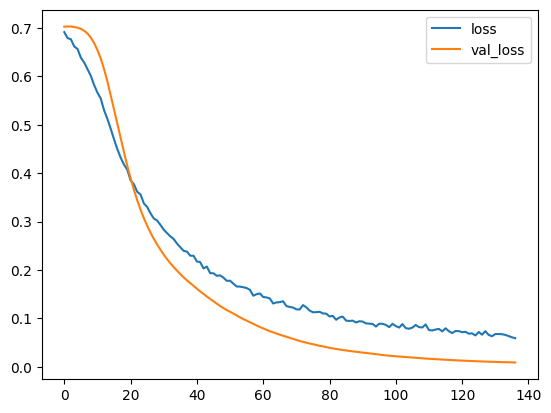

In [26]:
history_df=pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
plt.show()

In [27]:
predictions=model.predict(x_test)
predictionsx= np.round_(predictions).astype(int)
print(y_test.shape,predictions.shape)

20/20 [==============================] - 0s 2ms/step
(640,) (640, 1)


In [28]:
from sklearn.metrics import confusion_matrix
confusionmatrix=confusion_matrix(predictionsx,y_test)
print(confusionmatrix)

[[305   0]
 [  0 335]]


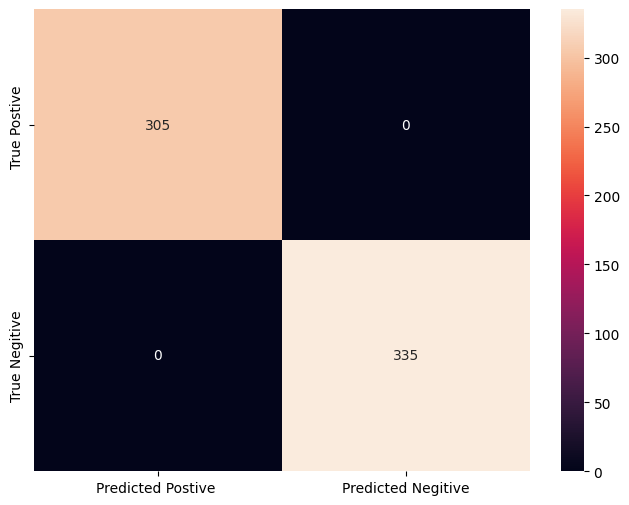

In [29]:
plt.rcParams['figure.figsize']=[8,6]
import seaborn as sns
sns.heatmap(confusionmatrix,annot=True,fmt='g',xticklabels=['Predicted Postive ','Predicted Negitive'],yticklabels=['True Postive ','True Negitive'])
plt.show()

In [30]:
x_test = pd.read_csv("/kaggle/input/aids-data-quest-society/test_ds.csv")
predictions = model.predict(x_test)
predictionsx= np.round_(predictions).astype(int)

25/25 [==============================] - 0s 1ms/step


In [31]:
x_test['Quality'] = predictionsx

In [32]:
dataFrame = x_test[['ID',"Quality"]]

In [33]:
dataFrame['Quality'] = dataFrame['Quality'].map({1: 'good', 0: 'bad'})

/tmp/ipykernel_18/2349301816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['Quality'] = dataFrame['Quality'].map({1: 'good', 0: 'bad'})


In [34]:
dataFrame

,ID,Quality
0,2307.0,good
1,3856.0,good
2,3205.0,good
3,564.0,good
4,2975.0,good
...,...,...
795,1749.0,good
796,3231.0,good
797,2891.0,good
798,3153.0,good


In [35]:
dataFrame.to_csv('submissions.csv',index=False)

In [36]:
dataFrame.head()

,ID,Quality
0,2307.0,good
1,3856.0,good
2,3205.0,good
3,564.0,good
4,2975.0,good


In [37]:
dataFrame.head()

,ID,Quality
0,2307.0,good
1,3856.0,good
2,3205.0,good
3,564.0,good
4,2975.0,good


In [38]:
print(dataFrame)

         ID Quality
0    2307.0    good
1    3856.0    good
2    3205.0    good
3     564.0    good
4    2975.0    good
..      ...     ...
795  1749.0    good
796  3231.0    good
797  2891.0    good
798  3153.0    good
799   401.0    good

[800 rows x 2 columns]
